In [13]:
# imports
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [4]:
# read in data
data = pd.read_table('C:/Users/Michael/projects/DAT5/data/auto_mpg.txt',sep='|')
data.drop('car_name',axis=1,inplace=True) #drop labels from dataframe
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18,8,307,130,3504,12.0,70,1
1,15,8,350,165,3693,11.5,70,1
2,18,8,318,150,3436,11.0,70,1
3,16,8,304,150,3433,12.0,70,1
4,17,8,302,140,3449,10.5,70,1


In [5]:
# standardize our data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [6]:
# set random seed for reproducibility
np.random.seed(0)

# run KMeans
est = KMeans(n_clusters=2,init='random') # instantiate estimator
est.fit(data_scaled) # fit your data
y_kmeans = est.predict(data_scaled) # make cluster "predictions"

In [9]:
# inspect the data by looking at the means for each cluster
data.groupby(y_kmeans).mean()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,28.720536,4.15625,115.162946,80.566964,2367.433036,16.443750,77.187500,1.995536
1,16.413095,7.22619,300.077381,136.339286,3791.119048,14.338095,74.369048,1.017857


In [10]:
# this can be compared to the overall means for each variable
data.mean()

mpg               23.445918
cylinders          5.471939
displacement     194.411990
horsepower       104.469388
weight          2977.584184
acceleration      15.541327
model_year        75.979592
origin             1.576531
dtype: float64

In [11]:
# we can get the coordinates for the center of each cluster
centers = est.cluster_centers_

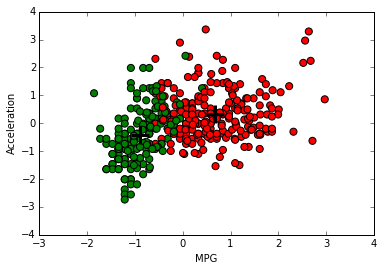

In [15]:
# visulazing the clusters
# we can create a nice plot to visualize this upon two of the dimensions
colors = np.array(['red','green','blue','yellow','orange'])

plt.figure()
plt.scatter(data_scaled[:,0],data_scaled[:,5],c=colors[y_kmeans],s=50)
plt.xlabel('MPG')
plt.ylabel('Acceleration')
plt.scatter(centers[:,0],centers[:,5],linewidths=3,marker='+',s=300,c='black')
plt.show()

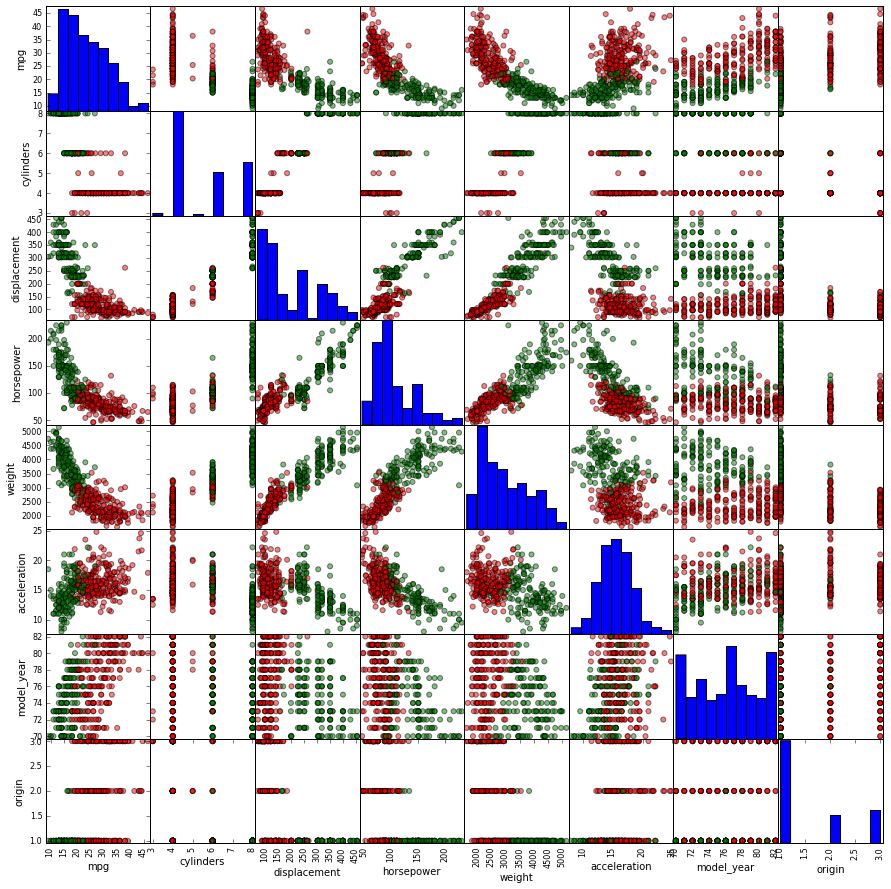

In [16]:
# we can generate a catter matrix to see all of the different dimensions paired
pd.scatter_matrix(data,c=colors[y_kmeans],figsize=(15,15),s=100)
plt.show()

In [17]:
# determining the number of clusters
# create a bunch of different models
k_rng = range(2,15)
k_est = [KMeans(n_clusters=k).fit(data) for k in k_rng]

In [18]:
# generally want Silhouette Coefficient to be closer to 1, while also minimizing K
from sklearn import metrics
silhouette_score = [metrics.silhouette_score(data,e.labels_,metric='euclidean') for e in k_est]

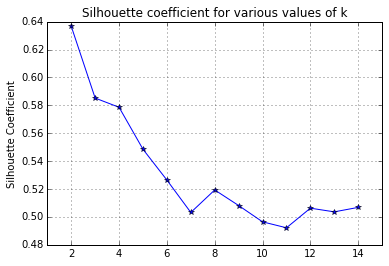

In [19]:
# plot the results
plt.figure()
plt.title('Silhouette coefficient for various values of k')
plt.plot(k_rng,silhouette_score,'b*-')
plt.xlim([1,15])
plt.grid(True)
plt.ylabel('Silhouette Coefficient')
plt.show()